In [1]:
import sys
import os
import matplotlib as mpl
import tqdm
import numpy as np
import matplotlib.pyplot as plt
import time
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

sys.path.append('../my_funcs/')
from pipeline_main import pipeline, dist
from pipeline_2D import to_osyris_ivs
from pipeline_streamers import infall_sphere, phi_average
from pipeline_1D import *


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
mpl.rc('font', **font)


Initialising patch data


100%|██████████| 4165/4165 [00:03<00:00, 1254.90it/s]


Converged mean angular momentum vector after 0 iteration(s)
17603.99566460253
Looping through patches, assigning azimuthal velocities to all cells and extracing them within given cylindrical coordiantes


100%|██████████| 4165/4165 [00:00<00:00, 8994.08it/s] 


Disk size: 17.9 au


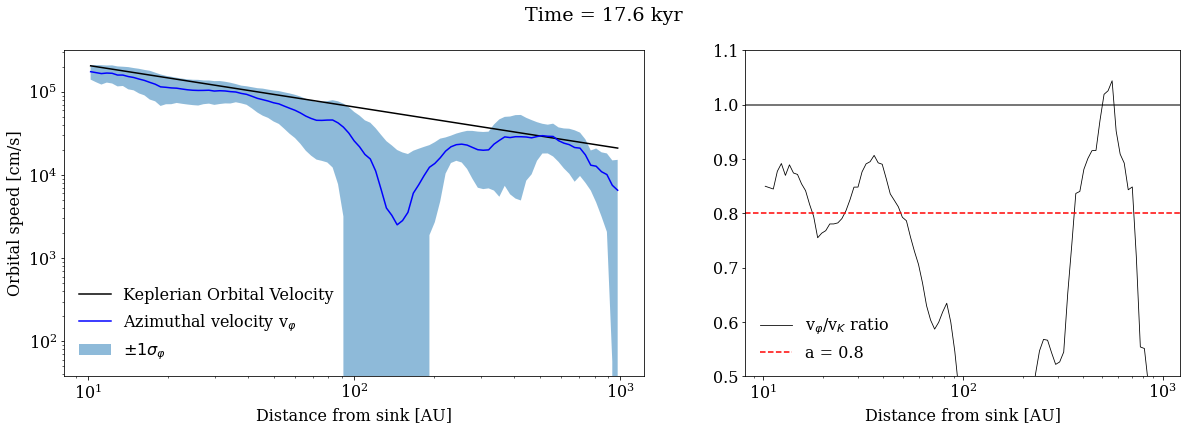

In [2]:
data = pipeline(snap = 357, run = 'my_core_13lacc', sink_id = 13)
data.recalc_L(verbose = 1); 
print(data.time)
data.calc_disksize()
plt.suptitle(f'Time = {data.time / 1e3:2.1f} kyr');

In [ ]:
data.sink_evolution()

Loading all snapshots - this might take awhile


100%|██████████| 135/135 [02:41<00:00,  1.20s/it]


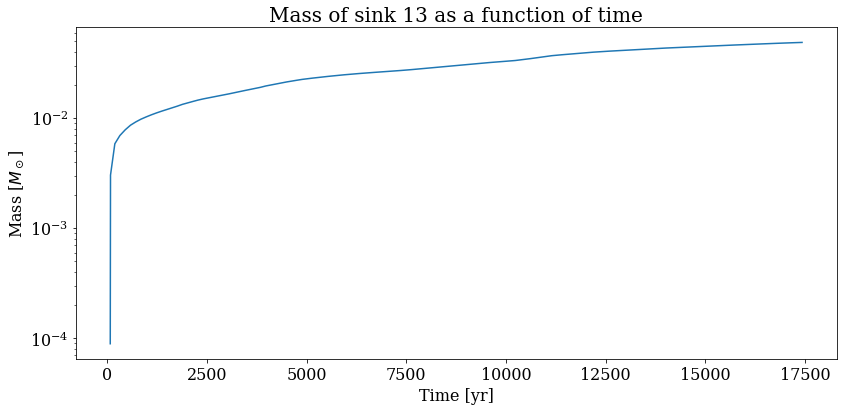

In [ ]:
fig, axs = plt.subplots(figsize = (12,6))
axs.semilogy(data.t_eval, data.mass_evo)
axs.set_xlabel('Time [yr]', fontsize=16); axs.set_ylabel('Mass [$M_\odot$]', fontsize=16); axs.set_title('Mass of sink 13 as a function of time', fontsize = 20)
plt.tight_layout()

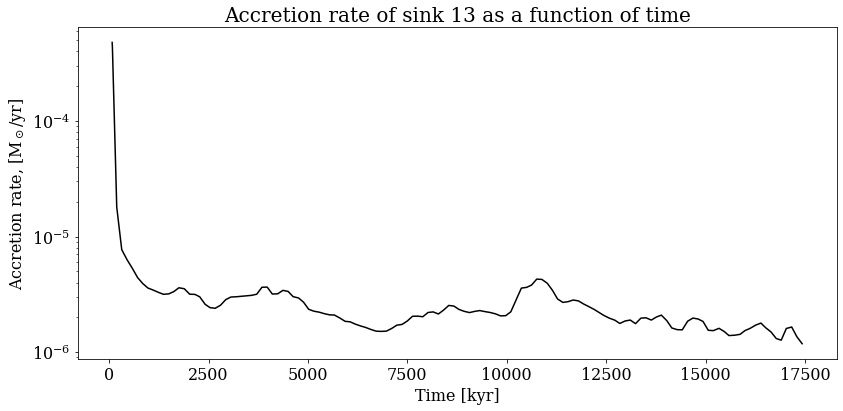

In [ ]:
fig, axs = plt.subplots(figsize = (12,6))

axs.semilogy(data.t_eval, data.sink_accretion, '-', markersize = 3, c = 'black'); 

axs.set_xlabel('Time [kyr]', fontsize=16); axs.set_ylabel('Accretion rate, [M$_\odot$/yr]', fontsize=16); axs.set_title('Accretion rate of sink 13 as a function of time', fontsize = 20)

plt.tight_layout()

In [3]:
x<

Looping over DISPATCH data to extract data at highest level


  0%|          | 0/1746 [00:00<?, ?it/s]

100%|██████████| 1746/1746 [00:06<00:00, 267.22it/s]


Setting up Osyris data structure


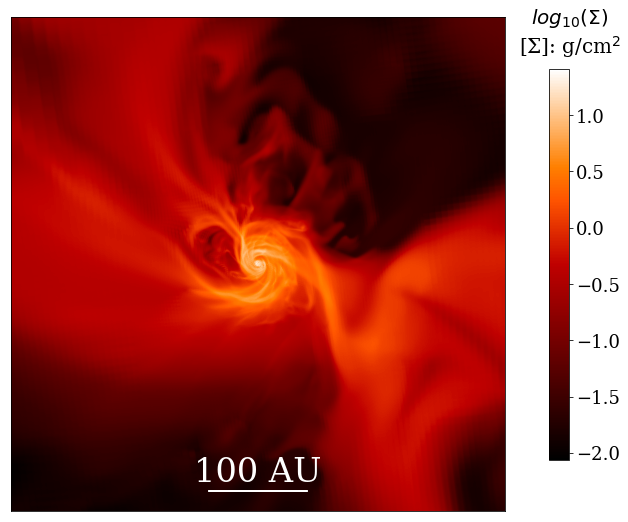

In [4]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data.osyris_ivs[0] * data.cgs_density), extent = (-250, 250, -250, 250), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
#axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
axs.set_xticks([]); axs.set_yticks([])
scalebar = AnchoredSizeBar(axs.transData, 100, '100 AU', 'lower center', 
                    pad=0.5,
                    color='white',
                    
                    frameon=False,
                    fontproperties = fm.FontProperties(size=28*1.2),
                    size_vertical=1,
                    label_top=True)

axs.add_artist(scalebar)


cbar.ax.tick_params(labelsize=18)

In [5]:
variable = ['d']
data.calc_trans_xyz()
data.to_osyris_ivs(variables=variable, viewpoint=np.dot(data.rotation_matrix, np.array([1, 0, 0])))

Transforming old z-coordinate into mean angular momentum vector


100%|██████████| 4165/4165 [00:00<00:00, 5164.00it/s]


Looping over DISPATCH data to extract data at highest level


100%|██████████| 1411/1411 [00:03<00:00, 360.25it/s]


Setting up Osyris data structure


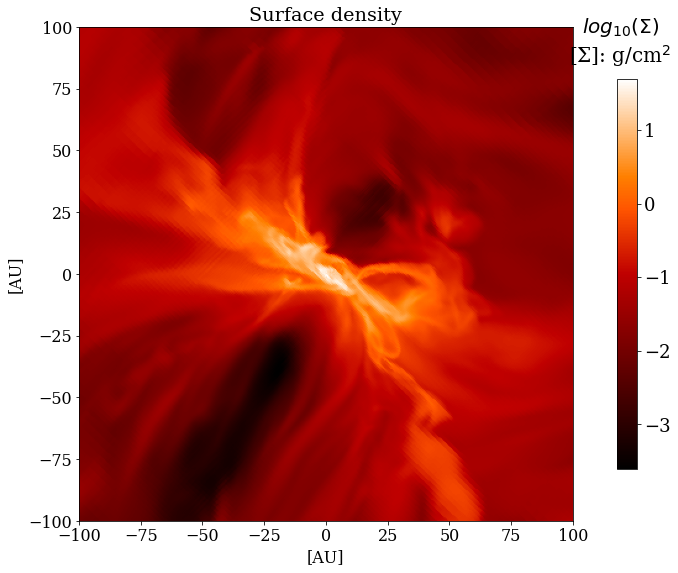

In [6]:
fig, axs = plt.subplots(figsize = (10, 10))
cs = axs.imshow(np.log10(data.osyris_ivs[0] * data.cgs_density), extent = (-100, 100, -100, 100), origin ='lower', cmap = 'gist_heat')
cbar = fig.colorbar(cs, ax = axs, fraction = 0.035, pad = 0.08);
cbar.ax.xaxis.set_label_coords(-10, -10)
cbar.set_label('$log_{10}(Σ)$\n[Σ]: g/cm$^2$', labelpad = -50, y = 1.16, rotation = 0, fontsize = 20)
axs.set(title = 'Surface density', ylabel = '[AU]', xlabel = '[AU]')
cbar.ax.tick_params(labelsize=18)

/lustre/hpc/astro/kxm508/codes/dispatch2/experiments/ISM/python/validations/../my_funcs/pipeline_streamers.py:130: RuntimeWarning: invalid value encountered in true_divide
  hist_ρ = (hist_mass* self.sn.scaling.m) / hist_vol


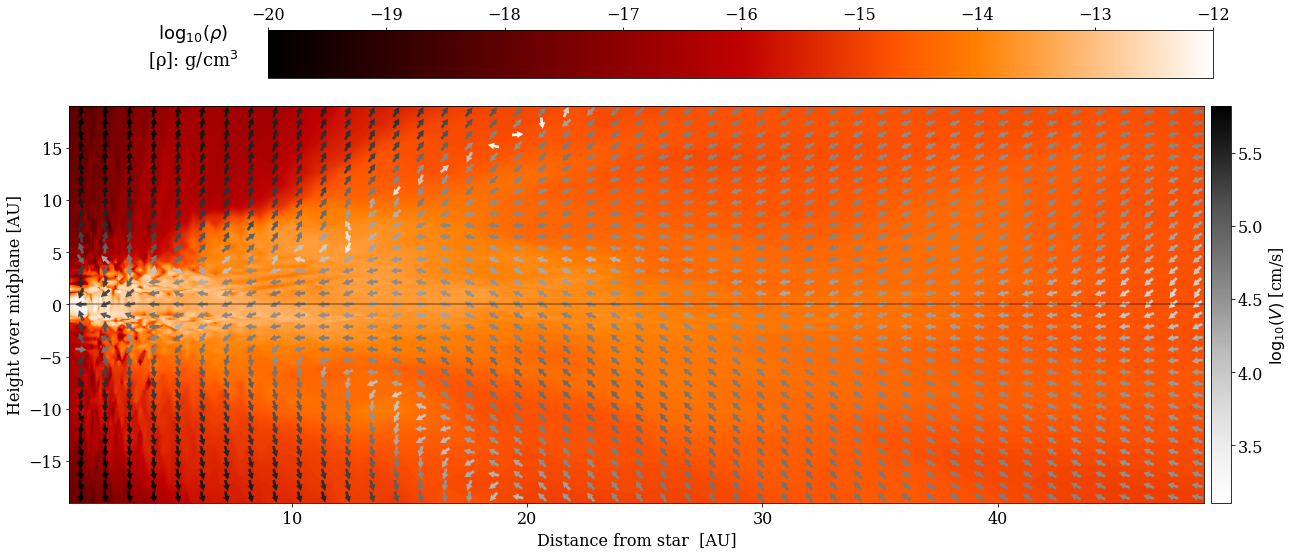

In [7]:
data.phiaverage()

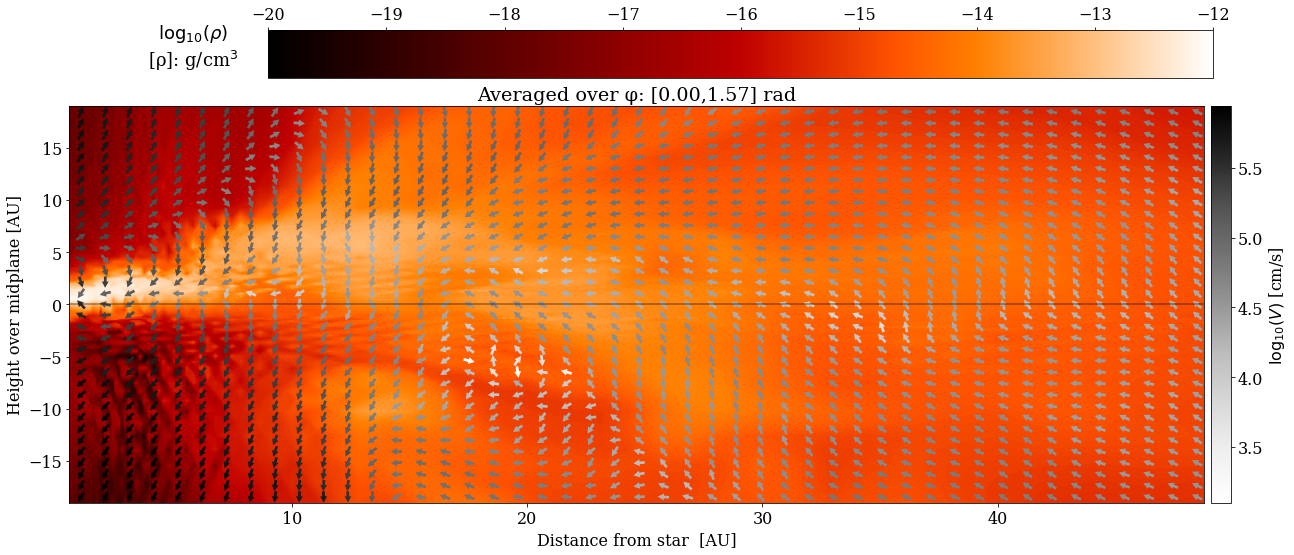

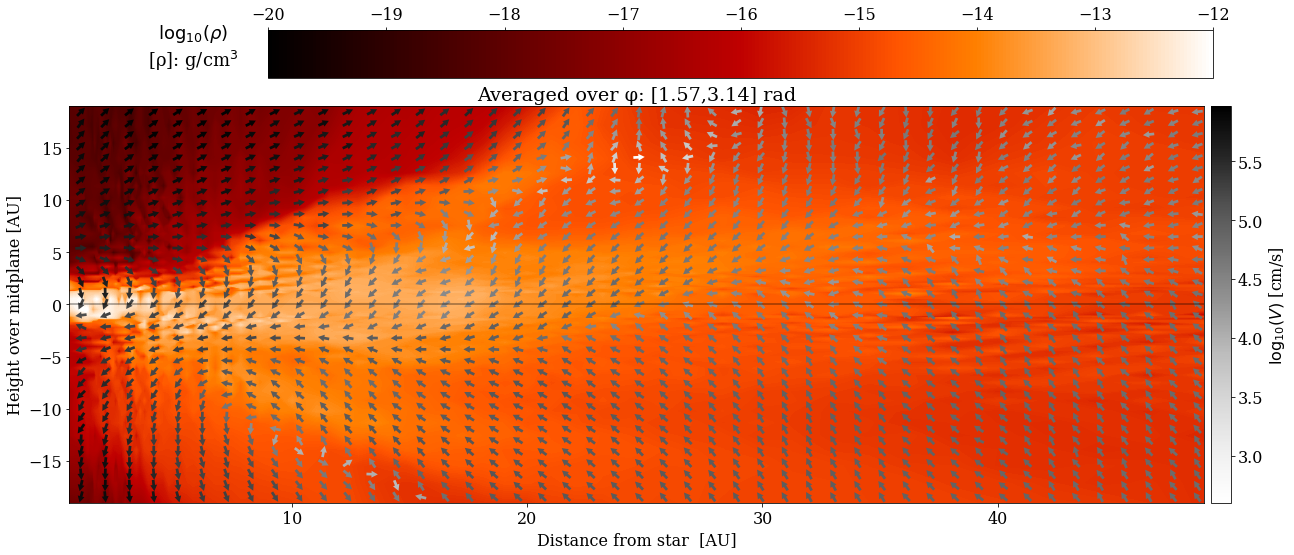

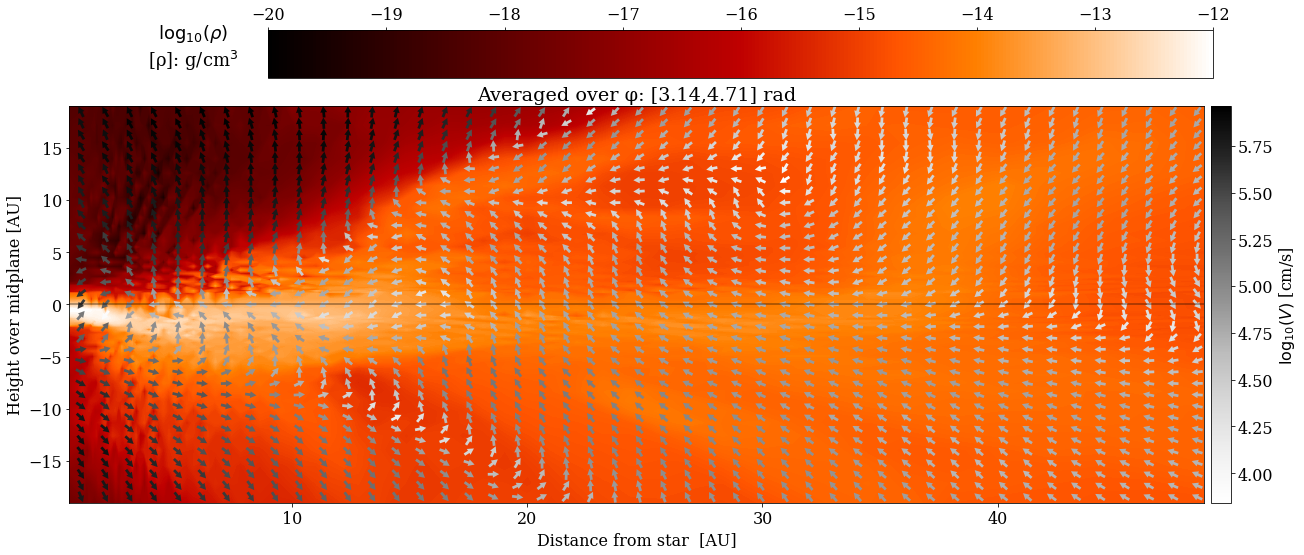

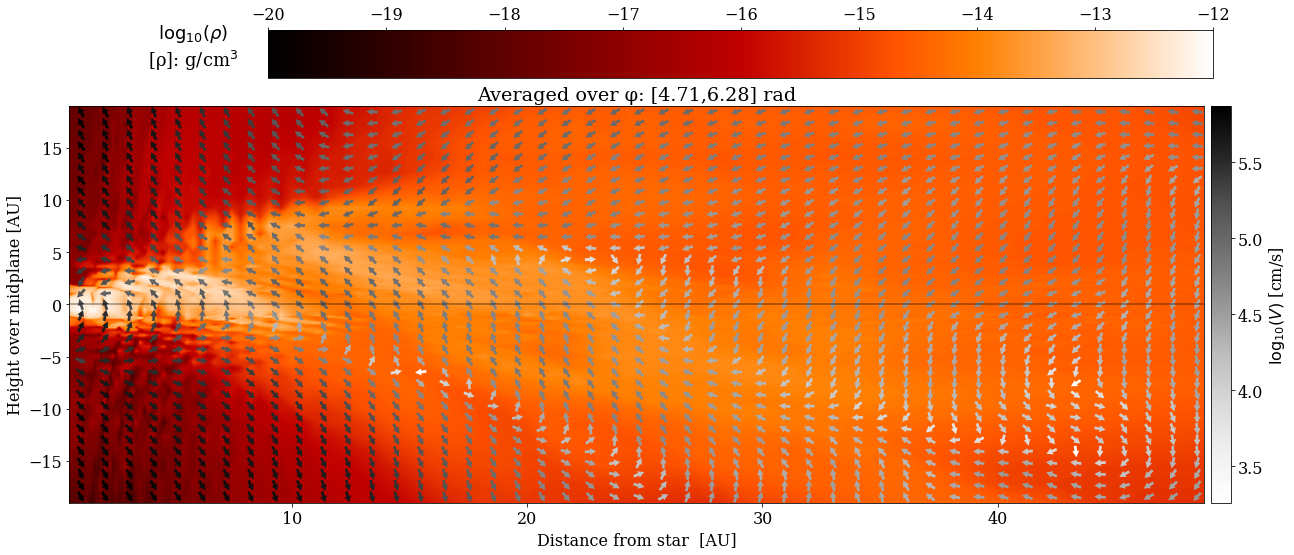

In [8]:
data.phiaverage(phi_extent=[0, 0.5*np.pi])
data.phiaverage(phi_extent=[0.5*np.pi, np.pi])
data.phiaverage(phi_extent=[np.pi, 3*np.pi/2])
data.phiaverage(phi_extent=[ 3*np.pi/2, 2*np.pi])

In [9]:
snaps = np.array([320, 340, 357])
Σ_evolution =  {key: [] for key in snaps}
H_evolution = {key: [] for key in snaps}
t_eval = np.zeros(len(snaps))

max_execution_time = 5

for i, snap in tqdm.tqdm(enumerate(snaps)):
    data.change_snapshot(snap, initialize=True)
    start_time = time.time()
    data.to_1D(show_plot=False)
    Σ_evolution[snap] = data.Σ_1D.copy()
    H_evolution[snap] = data.H_1D.copy()
    t_eval[i] = data.time

0it [00:00, ?it/s]

Initialising patch data


100%|██████████| 4165/4165 [00:16<00:00, 248.69it/s]


Looping through patches to extract densities and heights


100%|██████████| 4165/4165 [00:04<00:00, 852.33it/s] 


Fitting surface density and scaleheight in each radial bin


100%|██████████| 99/99 [00:01<00:00, 65.79it/s]
1it [00:28, 28.16s/it]

Initialising patch data


100%|██████████| 4165/4165 [00:17<00:00, 233.09it/s]


Looping through patches to extract densities and heights


100%|██████████| 4165/4165 [00:04<00:00, 939.56it/s] 


Fitting surface density and scaleheight in each radial bin


100%|██████████| 99/99 [00:01<00:00, 63.00it/s]
2it [00:56, 28.23s/it]

Initialising patch data


100%|██████████| 4165/4165 [00:03<00:00, 1324.08it/s]


Looping through patches to extract densities and heights


100%|██████████| 4165/4165 [00:04<00:00, 1003.23it/s]


Fitting surface density and scaleheight in each radial bin


100%|██████████| 99/99 [00:01<00:00, 56.65it/s]
3it [01:10, 23.62s/it]


In [12]:
os.chdir('graphics')
try:
    os.mkdir("surface_density_dec23")
except:
    pass

for i, snap in enumerate(snaps):
    fig, axs = plt.subplots(1, 2, figsize = (16,6))
    ax = axs[0]
    ax.loglog(data.r_1D * data.au_length, Σ_evolution[snap][:,0], color = 'black')
    ax.fill_between(data.r_1D * data.au_length, Σ_evolution[snap][:,0] - Σ_evolution[snap][:,1], Σ_evolution[snap][:,0] + Σ_evolution[snap][:,1], color = 'black', alpha = 0.5)
    ax.set(ylim = (1, 5e1), ylabel = 'Σ$_{gas}$ [g/cm$^2$]', xlabel = 'Distance from sink [au]', title = 'Surface density Σ$_{gas}$(r)')

    ax = axs[1]
    ax.semilogx(data.r_1D * data.au_length, H_evolution[snap][:,0], color = 'blue')
    ax.fill_between(data.r_1D * data.au_length, H_evolution[snap][:,0] - H_evolution[snap][:,1], H_evolution[snap][:,0] + H_evolution[snap][:,1], color = 'blue', alpha = 0.5)
    ax.set(ylabel = 'Scaleheight [au]', xlabel = 'Distance from sink [au]', title = 'Scaleheight  H$_p$(r)', ylim = (0, 120))
    fig.suptitle(f'Time = {t_eval[i]/1e3:2.1f} kyr')
    fig.tight_layout()
    plt.savefig(f'surface_density_nov23/imgs_{snap}.png', facecolor='w')
os.chdir('..')

FileNotFoundError: [Errno 2] No such file or directory: 'graphics'

In [11]:
os.chdir('..')